In [14]:
import yfinance as yf
ticker = 'SMDR.JK'
obj = yf.Ticker(ticker)
df = obj.history(period='5y')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-11 00:00:00+07:00,378.0,380.0,370.0,380.0,17025200,0.0,0.0
2023-05-12 00:00:00+07:00,380.0,382.0,372.0,378.0,12643300,0.0,0.0
2023-05-15 00:00:00+07:00,378.0,388.0,376.0,380.0,23341900,0.0,0.0
2023-05-16 00:00:00+07:00,380.0,386.0,372.0,374.0,16674100,0.0,0.0
2023-05-17 00:00:00+07:00,374.0,376.0,370.0,370.0,10997600,0.0,0.0


In [27]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the stock close price data into a pandas DataFrame called 'df'
# Assuming the date is stored in the index and the close prices are in the 'Close' column

p, q = 1, 0

# Create the ARMA model
model = ARIMA(df['Close'].pct_change().dropna(), order=(p,0,q))

# Fit the model to the data
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1243
Model:                 ARIMA(1, 0, 0)   Log Likelihood                2465.334
Date:                Wed, 17 May 2023   AIC                          -4924.669
Time:                        16:38:13   BIC                          -4909.293
Sample:                             0   HQIC                         -4918.887
                               - 1243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      1.707      0.088      -0.000       0.004
ar.L1          0.0713      0.018      3.870      0.000       0.035       0.107
sigma2         0.0011   2.13e-05     52.036      0.0

C:\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

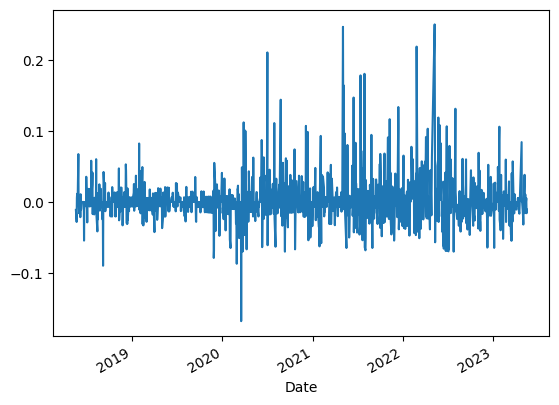

In [23]:
df['Close'].pct_change().plot()